# Final Project

In [56]:
# Import all the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Inspect and Clean Data

In [57]:
# Read all the datafiles
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [58]:
# Look at contract dataset using info method
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [59]:
# Convert column names to snake case
contract.columns = (contract.columns.str.strip().str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True).str.lower())
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [60]:
contract["total_charges"] = pd.to_numeric(contract["total_charges"], errors="coerce")
#contract["begin_date"] = pd.to_datetime(contract["begin_date"], errors="coerce")
#contract["end_date"]   = pd.to_datetime(contract["end_date"], errors="coerce")
contract.dtypes

customer_id           object
begin_date            object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
dtype: object

In [61]:
# Check for Null Values and Duplicates
print(f"contract null values: \n{contract.isnull().sum()}")
print(f"\ncontract Duplicate Values: {contract.duplicated().sum()}")

contract null values: 
customer_id           0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
dtype: int64

contract Duplicate Values: 0


In [62]:
contract[contract['total_charges'].isnull()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


In [63]:
# Drop the Null Values because its a very small number
contract = contract.dropna()
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   begin_date         7032 non-null   object 
 2   end_date           7032 non-null   object 
 3   type               7032 non-null   object 
 4   paperless_billing  7032 non-null   object 
 5   payment_method     7032 non-null   object 
 6   monthly_charges    7032 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


In [64]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [65]:
# Repeat with personal dataset

In [66]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [67]:
personal.columns = (personal.columns.str.strip().str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True).str.lower())
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [68]:
print(f"personal null values: \n{personal.isnull().sum()}")
print(f"\npersonal Duplicate Values: {personal.duplicated().sum()}")

personal null values: 
customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

personal Duplicate Values: 0


In [69]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [70]:
# Repeat with internet dataset

In [71]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [72]:
internet.columns = (internet.columns.str.strip().str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True).str.lower())
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [73]:
print(f"internet null values: \n{internet.isnull().sum()}")
print(f"\ninternet Duplicate Values: {internet.duplicated().sum()}")

internet null values: 
customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

internet Duplicate Values: 0


In [74]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [75]:
# Finally repeat with the phone dataset

In [76]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [77]:
phone.columns = (phone.columns.str.strip().str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True).str.lower())
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [78]:
print(f"phone null values: \n{phone.isnull().sum()}")
print(f"\nphone Duplicate Values: {phone.duplicated().sum()}")

phone null values: 
customer_id       0
multiple_lines    0
dtype: int64

phone Duplicate Values: 0


In [79]:
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### Step 2: Merge the 4 datasets into 1 Master dataset

In [80]:
# First merge contract and personal datasets
full = contract.merge(personal, on="customer_id", how="left")

# Then merge the internet dataset
full = full.merge(internet, on="customer_id", how="left")

# Finally merge the phone dataset
full = full.merge(phone, on="customer_id", how="left")

print(full.shape)
full.head(3)

(7032, 20)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No


In [81]:
# Check the merged dataset for duplicates and missing values
print(full.isnull().sum())
print(f"\nDuplicates in the Merged Set: {full.duplicated().sum()}")

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1520
online_security      1520
online_backup        1520
device_protection    1520
tech_support         1520
streaming_tv         1520
streaming_movies     1520
multiple_lines        680
dtype: int64

Duplicates in the Merged Set: 0


In [82]:
# Address the null values
full = full.fillna("No")
print(full.isnull().sum())
print(f"\nDuplicates in the Merged Set: {full.duplicated().sum()}")

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Duplicates in the Merged Set: 0


### Step 3: Convert Categorical Data

In [83]:
full.nunique()

customer_id          7032
begin_date             76
end_date                5
type                    3
paperless_billing       2
payment_method          4
monthly_charges      1584
total_charges        6530
gender                  2
senior_citizen          2
partner                 2
dependents              2
internet_service        3
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
multiple_lines          2
dtype: int64

In [84]:
# First check which columns are binary within the dataset
binary_cols = [col for col in full if full[col].nunique() == 2]
print(binary_cols)

['paperless_billing', 'gender', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']


In [85]:
# Now convert binary categorical columns to numeric
full[binary_cols] = full[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0})

In [86]:
# Check for numeric columns
print(full.select_dtypes(include=['number']).columns)

Index(['paperless_billing', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'multiple_lines'],
      dtype='object')


In [87]:
full.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,DSL,0,1,0,0,0,0,0
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,1,0,0,0,DSL,1,0,1,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,DSL,1,1,0,0,0,0,0


### Step 4: Analyze Distributions and Relationships

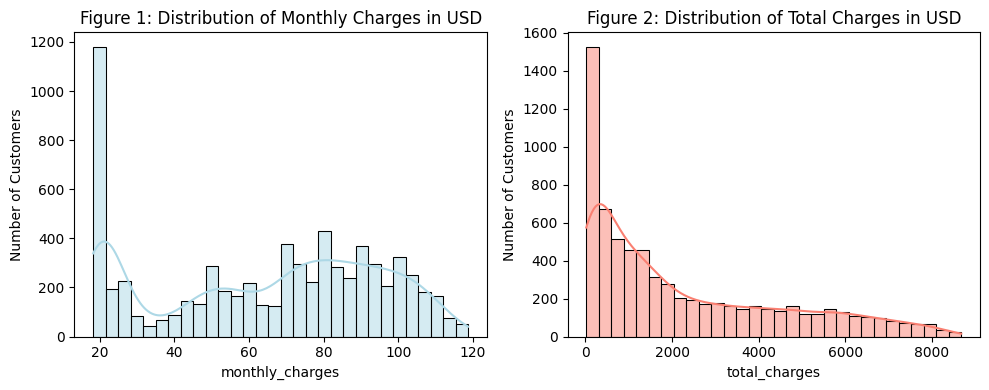

In [88]:
# Let's look at the distributions of both Monthly Charges and Total Charges
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(full["monthly_charges"], bins=30, ax=axes[0], kde=True, color='lightblue')
sns.histplot(full["total_charges"], bins=30, ax=axes[1], kde=True, color='salmon')
axes[0].set_title("Figure 1: Distribution of Monthly Charges in USD")
axes[0].set_ylabel("Number of Customers")
axes[1].set_title("Figure 2: Distribution of Total Charges in USD")
axes[1].set_ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [89]:
# Check the correlation matrix of all the features
corr_matrix = full.corr()
corr_matrix

,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
paperless_billing,1.000000,0.351930,0.157830,-0.011902,0.156258,-0.013957,-0.110131,-0.004051,0.127056,0.104079,0.037536,0.224241,0.211583,0.163746
monthly_charges,0.351930,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,0.490912
total_charges,0.157830,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.469042
gender,-0.011902,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.008883
senior_citizen,0.156258,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.142996
partner,-0.013957,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.142561
dependents,-0.110131,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.024307
online_security,-0.004051,0.296447,0.412619,-0.016328,-0.038576,0.143346,0.080786,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.098592
online_backup,0.127056,0.441529,0.510100,-0.013093,0.066663,0.141849,0.023639,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.202228
device_protection,0.104079,0.482607,0.522881,-0.000807,0.059514,0.153556,0.013900,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.201733


Text(0.5, 0.98, 'Figure 3: Key features related to Monthly Charges')

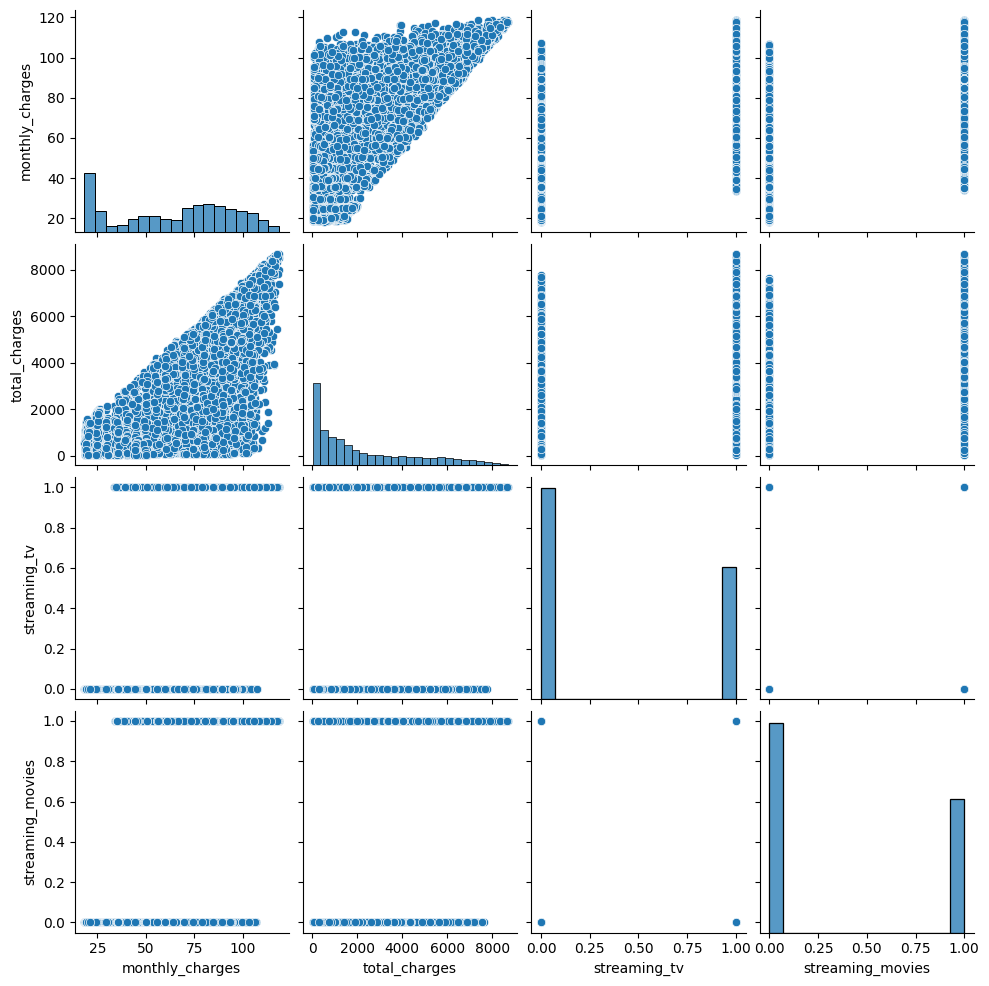

In [90]:
# Let's check moderate relationships with monthly charges
monthly_relations = corr_matrix['monthly_charges'][abs(corr_matrix['monthly_charges']) >= 0.5].index.tolist()
sns.pairplot(full[monthly_relations])
fig.suptitle("Figure 3: Key features related to Monthly Charges")

Text(0.5, 0.98, 'Figure 4: Key features related to total charges')

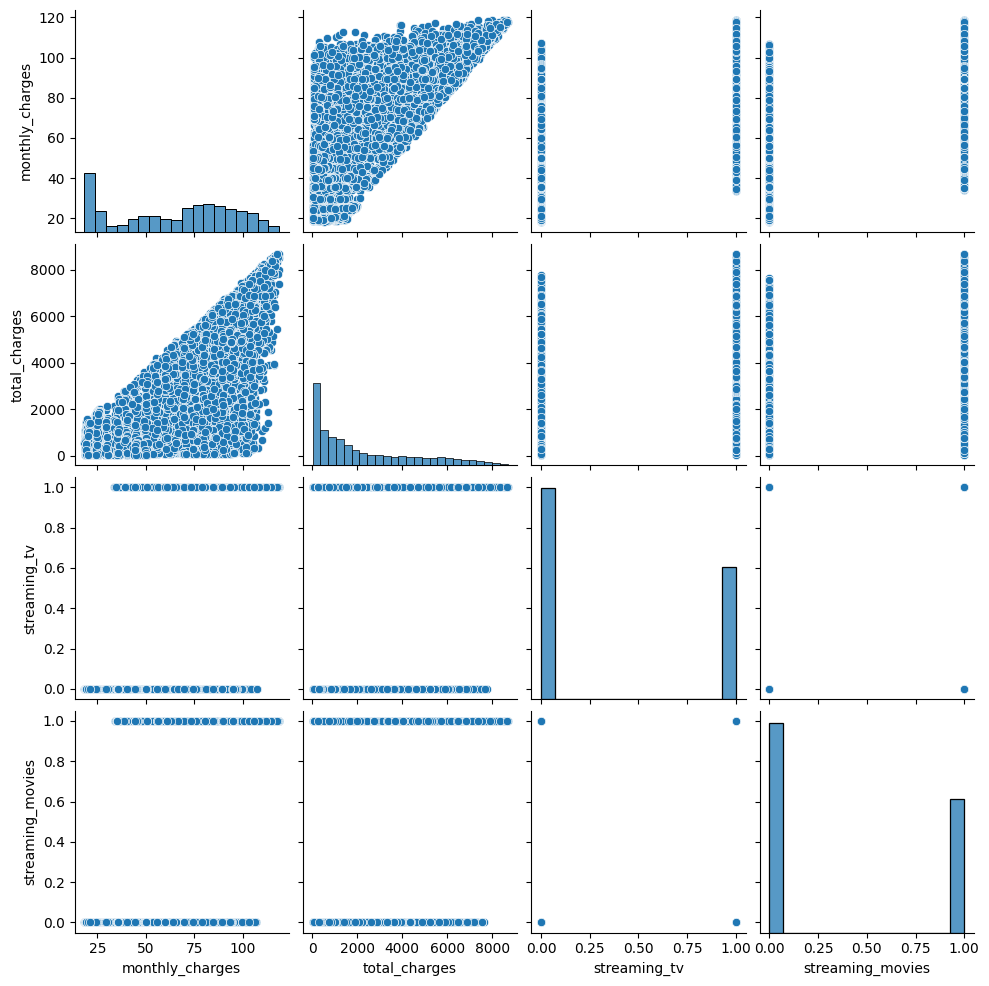

In [91]:
# Let's check moderate relationships with total charges
total_relations = corr_matrix['total_charges'][abs(corr_matrix['monthly_charges']) >= 0.5].index.tolist()
sns.pairplot(full[total_relations])
fig.suptitle("Figure 4: Key features related to total charges")

### Step 5: Identify any other relationships

In [92]:
full.head(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,DSL,0,1,0,0,0,0,0
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,1,0,0,0,DSL,1,0,1,0,0,0,0


In [ ]:
# Let's look into customers with End Date and their contact types
customers_leaving = full[full['end_date']!='No']
sns.countplot(x="type", data=customers_leaving)
plt.title("Figure 5: Distribution of Contract Types within Leaving Customers")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
plt.figure(figsize=(10,6)) 
sns.countplot(x="payment_method", data=customers_leaving)
plt.title("Figure 6: Distribution of Payment Method within Leaving Customers")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
plt.figure(figsize=(10,6)) 
sns.countplot(x="internet_service", data=customers_leaving)
plt.title("Figure 7: Distribution of Internet Service within Leaving Customers")
plt.ylabel("Number of Customers")
plt.show()

## Clarifying Questions

1. How does the data look? Are there any duplicates or missing values? How should they be addressed?
2. Is it a good idea to merge the 4 datasets into 1 and how should the be merged? Address null values after merge.
3. Some features are numeric and some are categorical. What can be done to make it easier to compare them?
4. Are there any relationships between the numeric features in the dataset?
5. Can you identify any relationships within any other features?

## Rough Plan for Solving the Task

**Step 1: Inspect the data and perform data cleaning**
- Read in all the 4 datasets and inspect each one individually for a better understanding of how the data looks by running basic operations such as df.info(), df.shape() and df.head().
- Perform data cleaning by ensuring all column names are snake case then check the data types are correct, there are no duplicates and handle missing values accordingly.

**Step 2: Merge Datasets into 1 Master set**
- It is a great idea to merge datasets whenever applicable and since there are 4 datasets here and all share the same column, 'customer_id', merging all 4 into 1 master set can be performed.
- Performing an inner join can cause the final dataset to drop all entries that where the customer_id does not match in both datasets. However, performing a left join will preserve all entries from the left side dataset and fill in missing values as NaN from the right side. This is the best approach here since it maintains all the data.
- The missing values in the full merged dataset can be addressed accordingly by replacing all NaN values with a 'No' and this works because the features that are missing values are binary. Additionally, converting the null values to 'No' does not skew the data since it reflects how the customer does not have those services.

**Step 3: Convert categorical data to numeric**
- It is important to address that columns that are numeric cannot directly be compared to columns that are categorical, as such, when applicable binary categorical columns can be converted to numeric. For instance, gender is a categorical column with 'Male' and 'Female' values but can be converted to numeric by assigning 0 to Male and 1 to Female. Likewise apply this idea to all categorical columns then analyze their relationships.
  
**Step 4: Look at Distributions and Relationships**
- Since monthly charges and total charges are the main numeric features, look at their distributions using histograms. This gives an understanding of how they relate to each other.
- Analyze the full dataset by looking at relationships of the numeric columns with each other using pairplots for both monthly charges and total charges.

**Step 5: Identify any other relationships**  
- Not all categorical features are binary, so they may require Feature Encoding such as One Hot Encoding. However, graphs can still be created to understand their relationships with other key features. Using plots, these features can be compared to a new category called, customers-leaving, which is all the customers that do have an End-Date.
- Using customers-leaving and graphing the different values for each of these non-binary categorical features, relationships can be drawn in terms of whether or not these features affect the customers from leaving or not.